## Observations and Insights 

In [ ]:
# Observations: This was one daunting task. It took me longer than it did for the rest of my classmates.
# The best drug for the mice seemed to be Capomulin; those mice had lower final tumor volumes.
# The study was successful. The study shows that the best results came from Capomulin, Ceftamin, Infubinol, and Ramicane.
# Providing charts, graphs made the data more relatable.

In [238]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset


In [239]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [240]:
mouse_metadata.shape

(249, 5)

In [241]:
study_results.shape

(1893, 4)

In [242]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [243]:
merge_df = study_results.merge(mouse_metadata, on="Mouse ID", how="left")
merge_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [244]:
merge_df2 = study_results.merge(mouse_metadata, on="Mouse ID")
merge_df2.shape

(1893, 8)

In [245]:
merge_df.shape

(1893, 8)

In [246]:
merge_df.describe()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
count,1893.000000,1893.000000,1893.000000,1893.000000,1893.000000
mean,19.572108,50.448381,1.021659,12.814580,25.662441
std,14.079460,8.894722,1.137974,7.189592,3.921622
min,0.000000,22.050126,0.000000,1.000000,15.000000
25%,5.000000,45.000000,0.000000,7.000000,25.000000
50%,20.000000,48.951474,1.000000,13.000000,27.000000
75%,30.000000,56.292200,2.000000,20.000000,29.000000
max,45.000000,78.567014,4.000000,24.000000,30.000000


In [247]:
merge_df["Mouse ID"].value_counts()

g989    13
t451    10
p136    10
v923    10
t198    10
        ..
o848     1
l872     1
t573     1
v199     1
h428     1
Name: Mouse ID, Length: 249, dtype: int64

In [248]:
# Checking the number of mice in the DataFrame.
mouselen = len(merge_df["Mouse ID"].unique())
mouselen

249

In [249]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupl = merge_df[merge_df.duplicated(subset=['Mouse ID', 'Timepoint'])]
dupl

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [250]:
# Optional: Get all the data for the duplicate mouse ID. 


In [251]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# drop = merge_df[merge_df.Mouse ID !="g989"]
# drop
# clean_df = merge_df.drop_duplicates(subset=["Mouse ID"], keep=False, inplace=True)
# clean_df
# !! When I performed this function, I only had 12 mice left !!

In [252]:
g989 = merge_df.loc[merge_df["Mouse ID"] == "g989", :]
g989

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [253]:
# Checking the number of mice in the clean DataFrame.
check = len(merge_df["Mouse ID"].value_counts())
check


249

In [229]:
drug_gb = merge_df.groupby(["Drug Regimen"])
drug_gb

In [169]:
# tumor_mean = drug_gb["Tumor Volume (mm3)"].mean()
# tumor_mean

In [170]:
# tumor_median = drug_gb["Tumor Volume (mm3)"].median()
# tumor_median

In [171]:
# tumor_variance = drug_gb["Tumor Volume (mm3)"].var()
# tumor_variance

In [172]:
# tumor_stdv = drug_gb["Tumor Volume (mm3)"].std()
# tumor_stdv

In [173]:
# tumor_sem = drug_gb["Tumor Volume (mm3)"].sem()
# tumor_sem

In [174]:
#sumtable_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median, "Tumor Volume Variance": tumor_variance, "Tumor Volume Std. Dev.": tumor_stdv, "Tumor Volume SEM": tumor_sem})
#sumtable_df

## Summary Statistics

In [230]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straightforward, creating multiple series and putting them all together at the end.
sumtable_df = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median, "Tumor Volume Variance": tumor_variance, "Tumor Volume Std. Dev.": tumor_stdv, "Tumor Volume SEM": tumor_sem})
sumtable_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [110]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function.
# !I'm not sure how to do it by this method.!

In [111]:
#barpandas = merge_df["Drug Regimen"].value_counts()
#barpandas.plot(kind="bar")
#plt.xlabel("Drug Regimen")
#plt.ylabel("Time Points")
#plt.show()
#plt.tight_layout()


In [112]:
#barx = merge_df["Drug Regimen"].value_counts()
#bary = merge_df["Timepoint"].value_counts()



In [113]:
# barpandas = merge_df[["Drug Regimen", "Timepoint"]]
# barpandas = barpandas.set_index("Drug Regimen")
# barpandas.head()

In [114]:
#ax = barpandas.plot.bar(x="Drug Regimen", y="Timepoint", rot=0)
#ax

## Bar Plots

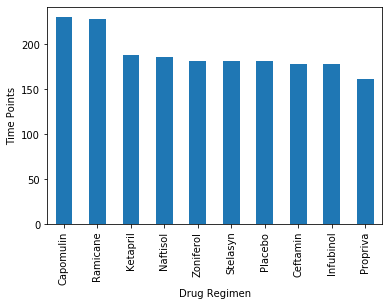

<Figure size 432x288 with 0 Axes>

In [115]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas.
barpandas = merge_df["Drug Regimen"].value_counts()
barpandas.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")
plt.show()
plt.tight_layout()

In [116]:
#barpandas = merge_df["Drug Regimen"].value_counts()
#barpandas

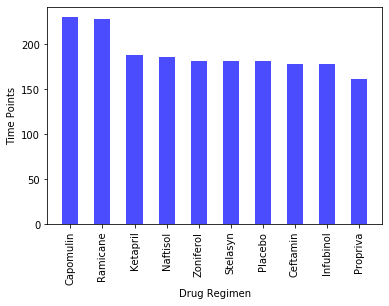

<Figure size 432x288 with 0 Axes>

In [117]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.
#x_axis = np.arange(len(merge_df["Drug Regimen"].value_counts()))
#tick_locations = [value for value in x_axis]
#bartime = merge_df["Timepoint"].count()
# rotation="vertical"
barpandas = merge_df["Drug Regimen"].value_counts()
drug = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Ceftamin", "Infubinol", "Propriva"]
nums = [230, 228, 188, 186, 182, 181, 181, 178, 178, 161]
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("Time Points")
plt.bar(drug, nums, facecolor="blue", alpha=0.70, width=0.5, align="center")
plt.show()
plt.tight_layout()

## Pie Plots

In [118]:
#men = merge_df.loc[merge_df["Sex"] == "Male", :]
#men.head()


In [119]:
#women = merge_df.loc[merge_df["Sex"] == "Female", :]
#women.head()

In [120]:
#pied = merge_df.DataFrame({"Male": men, "Female": women})
#pied
#pied = merge_df["Sex"].plot(kind="pie", subplots=True, figsize=(8, 4))
#pied
#pied = merge_df["Sex"].value_counts()
#pied
#pied.plot(kind="pie", autopct="%.1f%%", figsize=(8, 4))
#pied

Male      958
Female    935
Name: Sex, dtype: int64

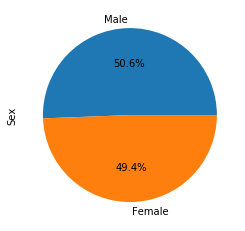

In [121]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
pied = merge_df["Sex"].value_counts()
pied
pied.plot(kind="pie", autopct="%.1f%%", figsize=(8, 4))
pied

In [122]:
#pied2 = merge_df["Sex"].value_counts()
#gender = ["Male", "Female"]
#plt.ylabel("Sex")
#plt.pie(pied2, labels=gender, autopct="%.1f%%")
#pied2

Male      958
Female    935
Name: Sex, dtype: int64

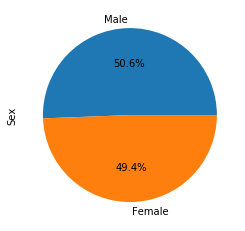

In [123]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
pied2 = merge_df["Sex"].value_counts()
gender = ["Male", "Female"]
plt.ylabel("Sex")
plt.pie(pied2, labels=gender, autopct="%.1f%%")
pied2

In [124]:
#Capomulin, Ramicane, Infubinol, and Ceftamin
#capo = merge_df.loc[merge_df["Tumor Volume (mm3)"] == "Capomulin", :]
#capo
quartiles = merge_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[.25]
upperq = quartiles[.75]
iqr = upperq - lowerq

print(f"The lower quartile of tumor volumes is: {lowerq}")
print(f"The upper quartile of tumor volumes is: {upperq}")
print(f"The interquartile range of tumor volumes is: {iqr}")
print(f"The median tumor volume is: {quartiles[0.5]}")


The lower quartile of tumor volumes is: 45.0
The upper quartile of tumor volumes is: 56.29220039
The interquartile range of tumor volumes is: 11.292200389999998
The median tumor volume is: 48.95147442


In [125]:
#quartiles = drug_gb["Tumor Volume (mm3)"].quantile([.25,.5,.75])
#lowerq = quartiles[.25]
#upperq = quartiles[.75]
#iqr = upperq - lowerq

#print(f"The lower quartile of tumor volumes is: {lowerq}")
#print(f"The upper quartile of tumpr volumes is: {upperq}")
#print(f"The interquartile range of tumor voluumes is: {iqr}")
#print(f"The median tumor volume is: {quartiles[0.5]}")

#import pandas as pd

#grouped_df = df1.groupby( [ "Name", "City"] )

#pd.DataFrame(grouped_df.size().reset_index(name = "Group_Count"))



In [167]:
#Capomulin, Ramicane, Infubinol, and Ceftamin
#if (4 in test_list): 
    #print ("Element Exists") 
# creating a bool series from isin() 
#new = data["Gender"].isin(["Male"]) 
# displaying data with gender = male only 
# data[new] 

# drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
# filt = merge_df["Drug Regimen"].isin(drug_list)
# filtered_df = merge_df[filt]
# filtered_df = filtered_df[filtered_df["Timepoint"]== 45.0]
# filtered_df.head()

In [168]:
# qDrugs_gb = merge_df.groupby(["Drug Regimen", "Tumor Volume (mm3)"])
# pd.DataFrame(qDrugs_gb.size().reset_index(name = "Drugs&Tumors"))
# qDrugs_gb.mean()
# filtered_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).describe()
# small_df = filtered_df[["Drug Regimen", "Tumor Volume (mm3)"]]
# small_df
# qDrugs_gb = filtered_df["Drug Regimen", "Tumor Volume (mm3)"].groupby(["Drug Regimen", "Tumor Volume (mm3)"])
# qDrugs_gb.describe()


In [128]:
# boxdrugs_df = filtered_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).quantile([.25,.5,.75])
# boxdrugs_df
# boxdrugs_df.plot(kind="box")

In [181]:
# capom = filtered_df[filtered_df["Drug Regimen"]== "Capomulin"]
# cc = capom["Tumor Volume (mm3)"].plot(kind="box")
# cc
# capom["Tumor Volume (mm3)"].head()

In [164]:
# ceft = filtered_df[filtered_df["Drug Regimen"]== "Ceftamin"]
# cf = ceft["Tumor Volume (mm3)"].plot(kind="box")
# cf

In [165]:
# rami = filtered_df[filtered_df["Drug Regimen"]== "Ramicane"]
# rf = rami["Tumor Volume (mm3)"].plot(kind="box")
# rf

In [166]:
# infu = filtered_df[filtered_df["Drug Regimen"]== "Infubinol"]
# inf = infu["Tumor Volume (mm3)"].plot(kind="box")
# inf

In [133]:
#drugs = [cc, cf, rf, inf] "with func .plot"
# plotit_df = pd.DataFrame({"Capomulin": capom, "Ceftamin": ceft, "Ramicane": rami, "Infubinol": infu})
# plotit_df
# drugs1 = [capom, ceft, rami, infu]
# names = ["Capomulin", "Ceftamin", "Ramicane", "Infubinol"]


In [162]:
# capom = filtered_df[filtered_df["Drug Regimen"]== "Capomulin"]
# cc = capom["Tumor Volume (mm3)"].plot(kind="box")
# cc
# ceft = filtered_df[filtered_df["Drug Regimen"]== "Ceftamin"]
# cf = ceft["Tumor Volume (mm3)"].plot(kind="box")
# cf
# rami = filtered_df[filtered_df["Drug Regimen"]== "Ramicane"]
# rf = rami["Tumor Volume (mm3)"].plot(kind="box")
# rf
# infu = filtered_df[filtered_df["Drug Regimen"]== "Infubinol"]
# inf = infu["Tumor Volume (mm3)"].plot(kind="box")
# inf
# plt.boxplot([capom, ceft, rami, infu], labels=["Capomulin", "Ceftamin", "Ramicane", "Infubinol"])
# plt.show()
# capomulin = merged_data.loc[merged_data["Drug Regimen"] == "Capomulin"]['Tumor Volume (mm3)']
# capomulin = merge_df.loc[merge_df["Drug Regimen"]== "Capomulin"["Tumor Volume (mm3)"]]
# capomulin
capomulin = merge_df.loc[merge_df["Drug Regimen"]== "Capomulin"]
capomulin2 = capomulin["Tumor Volume (mm3)"]
capomulin2
ceftamin = merge_df.loc[merge_df["Drug Regimen"]== "Ceftamin"]
ceftamin2 = ceftamin["Tumor Volume (mm3)"]
ceftamin2
ramicane = merge_df.loc[merge_df["Drug Regimen"]== "Ramicane"]
ramicane2 = ramicane["Tumor Volume (mm3)"]
ramicane2
infubinol = merge_df.loc[merge_df["Drug Regimen"]== "Infubinol"]
infubinol2 = infubinol["Tumor Volume (mm3)"]
infubinol2
capomulin2 = capomulin.iloc([merge_df["Tumor Volume (mm3)"]
capomulin2                             

In [161]:
# plt.boxplot([capomulin2, ceftamin2, ramicane2, infubinol2], labels=["Capomulin", "Ceftamin", "Ramicane", "Infubinol"])
# plt.show()

## Quartiles, Outliers and Boxplots

In [144]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. Calculate the IQR and quantitatively determine if there are any potential outliers. 
drug_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
filt = merge_df["Drug Regimen"].isin(drug_list)
filtered_df = merge_df[filt]
filtered_df = filtered_df[filtered_df["Timepoint"]== 45.0]
filtered_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby(["Drug Regimen"]).describe()

Tumor Volume (mm3)                                             \
                          count       mean       std        min        25%   
Drug Regimen                                                                 
Capomulin                  21.0  36.236114  5.608969  23.343598  32.377357   
Ceftamin                   13.0  64.132421  3.253497  59.741901  61.433892   
Infubinol                   9.0  65.755562  3.433282  60.918767  62.754451   
Ramicane                   20.0  34.955595  5.486439  22.050126  30.981175   

                                               
                    50%        75%        max  
Drug Regimen                                   
Capomulin     37.311846  40.159220  47.685963  
Ceftamin      64.299830  67.527482  68.923185  
Infubinol     66.083066  67.685569  72.226731  
Ramicane      34.848627  38.508305  45.220869

In [196]:
filtered_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1763,n364,45,31.095335,1,Ramicane,Male,4,17
1764,b128,45,38.982878,2,Capomulin,Female,9,22
1765,l661,45,59.851956,3,Ceftamin,Male,18,26
1766,y865,45,64.729837,3,Ceftamin,Male,23,26
1767,y769,45,68.594745,4,Ceftamin,Female,6,27


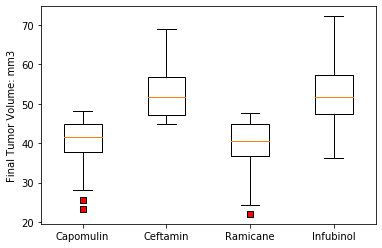

In [195]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
red_square = dict(markerfacecolor='r', marker='s')
plt.boxplot([capomulin2, ceftamin2, ramicane2, infubinol2], labels=["Capomulin", "Ceftamin", "Ramicane", "Infubinol"], flierprops=red_square)
plt.ylabel("Final Tumor Volume: mm3")
plt.show()

In [191]:
# capom["Tumor Volume (mm3)"].plot(kind="line")
# plt.ylabel("Tumor Volume")
# plt.xlabel("Capomulin")
# mouse = merge_df.loc[merge_df["Mouse ID"]== "b128"]
# mouse
# tmouse = mouse["Tumor Volume (mm3)"]
# tmouse.head()
# daymouse = mouse["Timepoint"]
# daymouse.head()
# plt.ylabel("Timepoint: Days")
# plt.xlabel("Tumor Volume")
# plt.plot(tmouse, daymouse, color="blue")

## Line and Scatter Plots

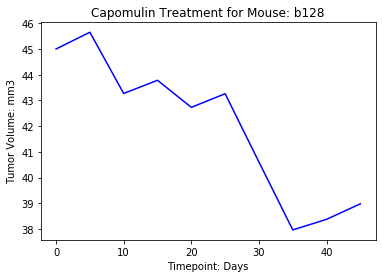

In [197]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
mouse = merge_df.loc[merge_df["Mouse ID"]== "b128"]
mouse
tmouse = mouse["Tumor Volume (mm3)"]
tmouse.head()
daymouse = mouse["Timepoint"]
daymouse.head()
plt.ylabel("Tumor Volume: mm3")
plt.xlabel("Timepoint: Days")
plt.title("Capomulin Treatment for Mouse: b128")
plt.plot(daymouse, tmouse, color="blue")

In [225]:
# capoweight = capomulin["Weight (g)"]
# capoweight

In [205]:
#plt.scatter(temp, sales, marker="o", facecolors="red", edgecolors="black", s=scoop_price)
# plt.scatter(capoweight, capomulin2, marker="o", edgecolor="black")
# plt.ylabel("Tumor Volume: mm3")
# plt.xlabel("Mouse Weight: g")
# plt.title("Capomulin Regimen")

Text(0.5, 1.0, 'Capomulin Regimen')

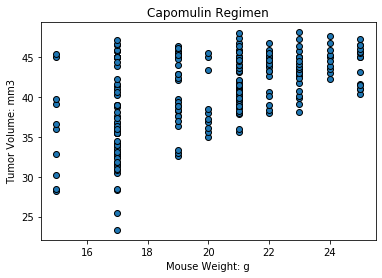

In [204]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
plt.scatter(capoweight, capomulin2, marker="o", edgecolor="black")
plt.ylabel("Tumor Volume: mm3")
plt.xlabel("Mouse Weight: g")
plt.title("Capomulin Regimen")


In [224]:
#print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(capoweight, capomulin2)[0],2)}")

In [ ]:
# mc_slope, mc_int, mc_r, mc_p, mc_std_err = stats.linregress(capomulin2, capoweight)
# mc_fit = mc_slope * capoweight + mc_int

## Correlation and Regression

The correlation coefficient between mouse weight and tumor volume is 0.53


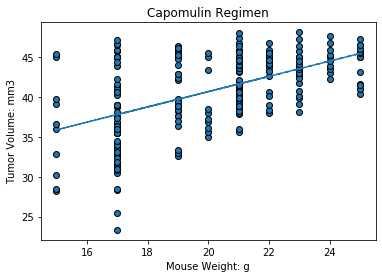

In [223]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mc_slope, mc_int, mc_r, mc_p, mc_std_err = st.linregress(capoweight, capomulin2)
mc_fit = mc_slope * capoweight + mc_int
plt.scatter(capoweight, capomulin2, marker="o", edgecolor="black")
plt.plot(capoweight, mc_fit, "--")
plt.ylabel("Tumor Volume: mm3")
plt.xlabel("Mouse Weight: g")
plt.title("Capomulin Regimen")
print(f"The correlation coefficient between mouse weight and tumor volume is {round(st.pearsonr(capoweight, capomulin2)[0],2)}")